# Predicting Car Prices

In this project, we'll practice the machine learning workflow to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. We can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [1]:
import pandas as pd
import numpy as np

with open('imports-85.data') as f:
    cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
           ]
    cars = pd.read_csv(f, names=cols)
    
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

We usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the `normalized-losses` column contains missing values represented using `"?"`. Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from `0` to `1`.

In [4]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    object 
 8   stroke             201 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    object 
 11  peak-rpm           203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [6]:
numeric_cars = numeric_cars.astype('float64')
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


In [7]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
# Normalize the DataFrame
normalized_cars = (numeric_cars - numeric_cars.mean())/(numeric_cars.std())
normalized_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,0.036224
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,0.414350
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,0.414350
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,0.093477
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,0.533891
5,0.000000,0.165335,0.251498,0.195551,-0.272351,-0.094079,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,0.257060
6,1.125132,1.154395,1.501278,2.622423,0.789818,0.557385,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,0.566608
7,0.000000,1.154395,1.501278,2.622423,0.789818,0.770029,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,0.718865
8,1.125132,1.154395,1.501278,2.622423,0.871523,1.025201,0.099271,-0.748720,0.452769,-0.465492,0.979591,0.799836,-1.273365,-1.568060,1.342366
10,2.187756,0.396116,0.210921,-0.518235,0.217881,-0.310589,-0.454322,0.631507,-1.445680,-0.340647,-0.064150,1.427302,-0.339254,-0.247473,0.405542


## Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure our code workflow and understand the features better.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_column, target_column, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    normalized_cars = df.reindex(shuffled_index)
    
    # Split number of rows in 75/25.
    split = int(len(df)*0.75)
    
    # Select the first 75% and set as training set.
    # Select the remaining 25% and set as test set.
    train = df[0:split].copy()
    test = df[split:].copy()
    
    # Instantiate an empty model for k-nearest neighbors
    model = KNeighborsRegressor()
    
    # Fit a KNN model using default k value.
    model.fit(train[[training_column]], train[target_column])
    
    # Make predictions using model.
    predicted_labels = model.predict(test[[training_column]])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(test[target_column], predicted_labels)
    rmse = mse**(1/2)
    
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

curb-weight          2467.101539
highway-mpg          2890.555953
city-mpg             3528.684805
engine-size          3544.400340
width                3816.793959
horsepower           3823.649087
wheel-base           5600.275810
compression-rate     5676.281281
height               6575.681183
length               6931.479640
peak-rpm             7162.518456
stroke               7674.212611
bore                 8173.167717
normalized-losses    9164.774862
dtype: float64

In [12]:
# Modify the knn_train_test() function you wrote to accept a parameter for the k value.
def knn_train_test(training_column, target_column, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    normalized_cars = df.reindex(shuffled_index)
    
    # Split number of rows in 75/25.
    split = int(len(df)*0.75)
    
    # Select the first 75% and set as training set.
    # Select the remaining 25% and set as test set.
    train = df[0:split].copy()
    test = df[split:].copy()
    
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    for value in k_values:
        # Instantiate an empty model for k-nearest neighbors
        model = KNeighborsRegressor(n_neighbors=value, algorithm='brute')
        
        # Fit a KNN model using default k value.
        model.fit(train[[training_column]], train[target_column])
        
        # Make predictions using model.
        predicted_labels = model.predict(test[[training_column]])
        
        # Calculate and return RMSE.
        mse = mean_squared_error(test[target_column], predicted_labels)
        rmse = mse**(1/2)
        k_rmses[value] = rmse
         
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value and add to the dictionary `k_rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 9763.670018763136,
  3: 10818.160016655766,
  5: 10459.31355225159,
  7: 8721.86442910275,
  9: 8483.94000699926},
 'wheel-base': {1: 6427.591370298007,
  3: 5206.211965784695,
  5: 5715.731830795477,
  7: 5361.262114183823,
  9: 4961.787607181016},
 'length': {1: 6411.526408145953,
  3: 5902.530665861713,
  5: 6704.83131229075,
  7: 5610.817094130365,
  9: 4875.460608273085},
 'width': {1: 8022.359945679277,
  3: 5057.499200964444,
  5: 4513.305415038048,
  7: 3908.5439001970926,
  9: 3493.337178085829},
 'height': {1: 13040.292321997129,
  3: 8804.80767773096,
  5: 6509.1792164724475,
  7: 5455.688669154601,
  9: 5230.879153425731},
 'curb-weight': {1: 3703.4384738256103,
  3: 2513.558140376798,
  5: 2480.661150643861,
  7: 2665.4246017704363,
  9: 2593.4427859318976},
 'engine-size': {1: 5107.624976636478,
  3: 4583.387238661021,
  5: 3714.1793436589383,
  7: 3306.9423843746404,
  9: 3106.532146734949},
 'bore': {1: 9314.370085949946,
  3: 13268.32195399801

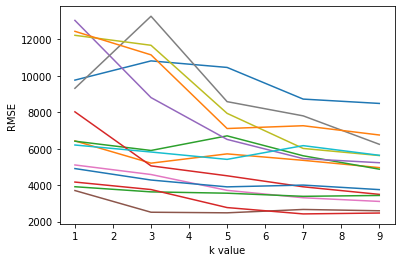

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate Model

Let's modify the `knn_train_test()` function we wrote in the last step to work with multiple columns.

In [14]:
def knn_train_test(features, target_column, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    normalized_cars = df.reindex(shuffled_index)
    
    # Split number of rows in 75/25.
    split = int(len(df)*0.75)
    
    # Select the first 75% and set as training set.
    # Select the remaining 25% and set as test set.
    train = df[0:split].copy()
    test = df[split:].copy()
    
    k_values = [5]
    k_rmses = {}
    
    for value in k_values:
        # Instantiate an empty model for k-nearest neighbors
        model = KNeighborsRegressor(n_neighbors=value, algorithm='brute')
        
        # Fit a KNN model using default k value.
        model.fit(train[features], train[target_column])
        
        # Make predictions using model.
        predicted_labels = model.predict(test[features])
        
        # Calculate and return RMSE.
        mse = mean_squared_error(test[target_column], predicted_labels)
        rmse = mse**(1/2)
        k_rmses[value] = rmse
         
    return k_rmses

# Best 5 features from the previous step
rmse_results_series.sort_values().head()

curb-weight    2467.101539
highway-mpg    2890.555953
city-mpg       3528.684805
engine-size    3544.400340
width          3816.793959
dtype: float64

In [15]:
# Using the best 2 features
two_features = ['curb-weight', 'highway-mpg']
two_feature_rmse = knn_train_test(two_features, 'price', normalized_cars)
print('two_feature_rmse: {}'.format(two_feature_rmse))

# Using the best 3 features
three_features = ['curb-weight', 'highway-mpg', 'city-mpg']
three_feature_rmse = knn_train_test(three_features, 'price', normalized_cars)
print('three_feature_rmse: {}'.format(three_feature_rmse))

# Using the best 4 features
four_features = ['curb-weight', 'highway-mpg', 'city-mpg', 'engine-size']
four_feature_rmse = knn_train_test(four_features, 'price', normalized_cars)
print('four_feature_rmse: {}'.format(four_feature_rmse))

# Using the best 5 features
five_features = ['curb-weight', 'highway-mpg', 'city-mpg', 'engine-size', 'width']
five_feature_rmse = knn_train_test(five_features, 'price', normalized_cars)
print('five_feature_rmse: {}'.format(five_feature_rmse))


two_feature_rmse: {5: 0.3411505664552555}
three_feature_rmse: {5: 0.2838840927263036}
four_feature_rmse: {5: 0.26394763722341963}
five_feature_rmse: {5: 0.2808455717556431}


## Hyperparameter tuning

Let's now optimize the model that performed the best in the previous step.

In [16]:
def knn_train_test(features, target_column, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    normalized_cars = df.reindex(shuffled_index)
    
    # Split number of rows in 75/25.
    split = int(len(df)*0.75)
    
    # Select the first 75% and set as training set.
    # Select the remaining 25% and set as test set.
    train = df[0:split].copy()
    test = df[split:].copy()
    
    k_values = [i for i in range(1,26)]
    k_rmses = {}
    
    for value in k_values:
        # Instantiate an empty model for k-nearest neighbors
        model = KNeighborsRegressor(n_neighbors=value, algorithm='brute')
        
        # Fit a KNN model using default k value.
        model.fit(train[features], train[target_column])
        
        # Make predictions using model.
        predicted_labels = model.predict(test[features])
        
        # Calculate and return RMSE.
        mse = mean_squared_error(test[target_column], predicted_labels)
        rmse = mse**(1/2)
        k_rmses[value] = rmse
         
    return k_rmses

# Using the best 3 features
three_features = ['curb-weight', 'highway-mpg', 'city-mpg']
three_feature_rmse = knn_train_test(three_features, 'price', normalized_cars)
three_feature_rmse

{1: 0.4663466723181081,
 2: 0.3239561590890869,
 3: 0.2809146666573974,
 4: 0.28132931477445017,
 5: 0.2838840927263036,
 6: 0.27166784384240983,
 7: 0.2802351004679842,
 8: 0.2733719122730075,
 9: 0.27741699525115426,
 10: 0.30170363858965005,
 11: 0.30588727558218715,
 12: 0.308416994214848,
 13: 0.3076320423391587,
 14: 0.3049672713332573,
 15: 0.30110309180666506,
 16: 0.29806001376090774,
 17: 0.2907883080689437,
 18: 0.29047857460541643,
 19: 0.2896860201559714,
 20: 0.28799944768317276,
 21: 0.2825796186089414,
 22: 0.2734920519265317,
 23: 0.2686513157560866,
 24: 0.2525684068395126,
 25: 0.24880689793621882}

In [17]:
# Using the best 4 features
four_features = ['curb-weight', 'highway-mpg', 'city-mpg', 'engine-size']
four_feature_rmse = knn_train_test(four_features, 'price', normalized_cars)
four_feature_rmse

{1: 0.4751967802240229,
 2: 0.310313170212461,
 3: 0.29595296950827166,
 4: 0.2640651176812506,
 5: 0.26394763722341963,
 6: 0.25393290815183506,
 7: 0.2762197104086452,
 8: 0.2742278996858826,
 9: 0.2767072697841645,
 10: 0.2705224198618347,
 11: 0.2674416495533901,
 12: 0.27468484417462785,
 13: 0.2718694367267781,
 14: 0.2725101276334679,
 15: 0.2750653914333349,
 16: 0.2704145284289273,
 17: 0.2797630079922623,
 18: 0.27841294168795505,
 19: 0.2816102449459367,
 20: 0.2791998631678869,
 21: 0.2788716829353412,
 22: 0.27383885578125594,
 23: 0.2722156526701716,
 24: 0.2722910617967856,
 25: 0.27631646629877354}

In [18]:
# Using the best 5 features
five_features = ['curb-weight', 'highway-mpg', 'city-mpg', 'engine-size', 'width']
five_feature_rmse = knn_train_test(five_features, 'price', normalized_cars)
five_feature_rmse

{1: 0.36262427352316684,
 2: 0.28629166518391397,
 3: 0.27915891769169476,
 4: 0.2745858047649905,
 5: 0.2808455717556431,
 6: 0.27866154143387933,
 7: 0.2644058505339908,
 8: 0.26490244156826137,
 9: 0.27016884689681153,
 10: 0.25501571780944643,
 11: 0.2495335184477356,
 12: 0.24782381211480156,
 13: 0.2436785619037127,
 14: 0.23467260180533778,
 15: 0.23290937534299183,
 16: 0.2291167454121962,
 17: 0.2309097920951509,
 18: 0.2351952988636927,
 19: 0.23792174909746253,
 20: 0.24301058512967466,
 21: 0.24472163658148183,
 22: 0.2503231072896947,
 23: 0.25327115682048523,
 24: 0.25650949499100784,
 25: 0.2547607201578489}

In [19]:
from sklearn.model_selection import KFold, cross_val_score

features = ['curb-weight', 'highway-mpg', 'city-mpg', 'engine-size', 'width']

kf = KFold(5, shuffle=True, random_state=1)
model = KNeighborsRegressor()
mses = cross_val_score(model, normalized_cars[features], normalized_cars['price'], scoring='neg_mean_squared_error', cv=kf)
rmses = np.sqrt(np.absolute(mses))
avg_rmse = np.mean(rmses)
print(avg_rmse)

0.40550223424819176
